In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("Social_Network_Ads.csv")
df = df.iloc[:, 2:]

In [61]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'], test_size=0.3, random_state=42)

In [63]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameter
scaler.fit(X_train) #will learn from the train data

#transform train and test set
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [73]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [75]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


Befor scalling, mean is 37.6 and standard deviation is 3394805.

In [76]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


After scalling, mean is 0 and std is 1. 

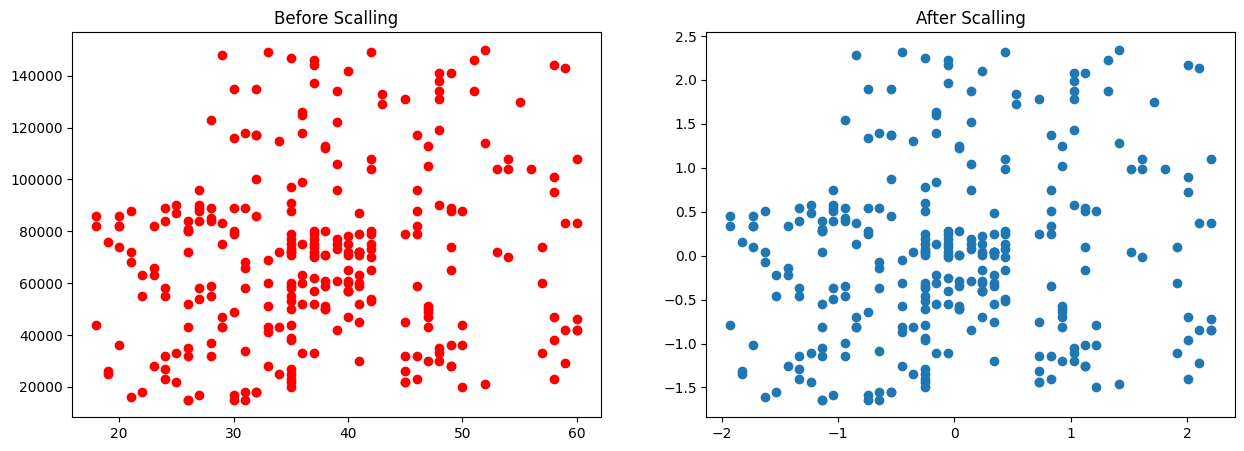

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color = "red")
ax1.set_title("Before Scalling")

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scalling")
plt.show()

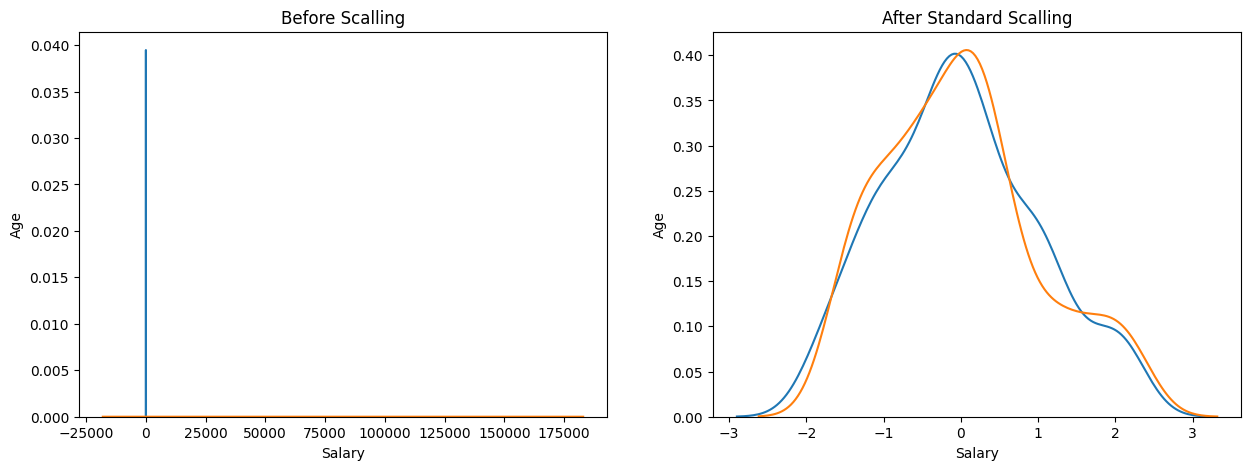

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))
#before scalling
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_xlabel("Salary")
ax1.set_ylabel('Age')
ax1.set_title('Before Scalling')

#after scalling
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_xlabel("Salary")
ax2.set_ylabel("Age")
ax2.set_title("After Standard Scalling")

plt.show()

In the first graph, age and salary is the comparable wheras in second graph, it is comparable. The is only possible after standard scalling.

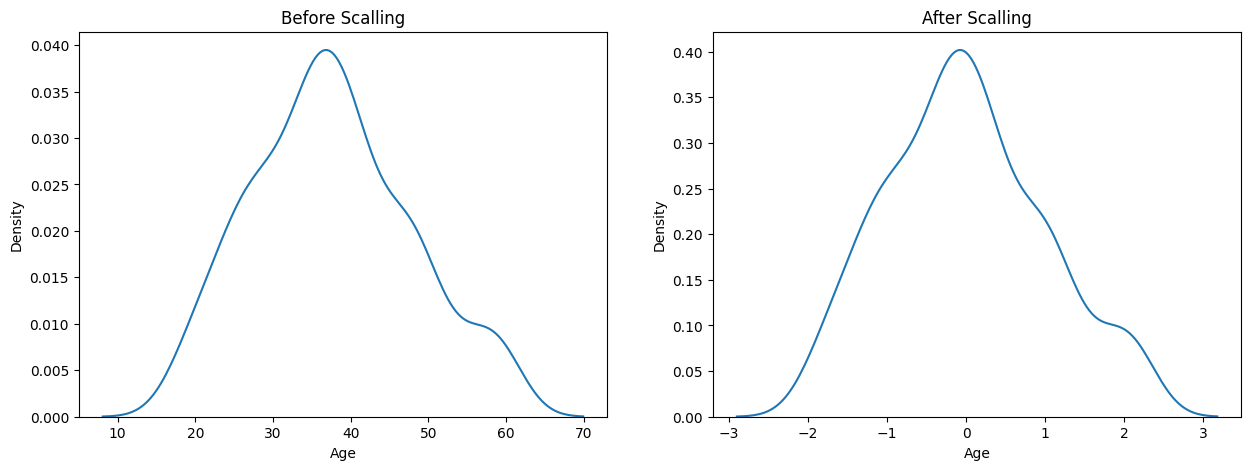

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))
ax1.set_title("Before Scalling")
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title("After Scalling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

The distribution should remain the same after using the scalling.

**Why Scalling is Important**

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [120]:
lr.fit(X_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [121]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.85
Scaled 0.85


With Decision Tree classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [113]:
dt.fit(X_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [115]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [116]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8583333333333333
Scaled 0.8333333333333334
